
# Classifier_MNIST_ADAM_Test#
### In this example ADAM is being used and slightly better results are obtained than with nesterov sgd. A simple architecture using maxpool as well and few training iterations already result in a very good classification (>95%).
#### Network ####
Conv (5x5) -
Maxp -
Conv (3x3) -
Flatten -
Dense
#### Note ####
Always converges to a nice solution

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.3
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb

In [3]:
# Load Mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, cache=True)
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)

# Data vectors are expected in columns
trX = trX.transpose();
teX = teX.transpose();

In [4]:
# Do one-hot encoding  of the labels
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
enc.fit(trY.reshape(-1, 1))

trLabelsOneHot = enc.transform(trY.reshape(-1, 1)).toarray()
teLabelsOneHot = enc.transform(teY.reshape(-1, 1)).toarray()

In [5]:
# dataset properties
print("Values per Image:", trX.shape[0])
print("Number of images for training:", trX.shape[1])
print("Number of images for testing:", teX.shape[1])
print("--- ---")
print("Training Labels:", trLabelsOneHot.shape[0])
print("Training Labels:", trLabelsOneHot.shape[1])

Values per Image: 784
Number of images for training: 46900
Number of images for testing: 23100
--- ---
Training Labels: 46900
Training Labels: 10


In [6]:
#subsample if necessary
trainSampleSize = 46900;
trXSub = trX[:,0:trainSampleSize]
trLabelsOneHotSub = trLabelsOneHot[0:trainSampleSize,:]
testSampleSize = 23100;
teXSub = teX[:,0:testSampleSize]
teLabelsOneHotSub = teLabelsOneHot[0:testSampleSize,:]
print("Values per Image:", trXSub.shape[0])
print("Number of images for training:", trXSub.shape[1])
print("Number of images for testing:", teXSub.shape[1])
print("--- ---")
print("Training Labels:", trLabelsOneHotSub.shape[0])
print("Training Labels:", trLabelsOneHotSub.shape[1])

Values per Image: 784
Number of images for training: 46900
Number of images for testing: 23100
--- ---
Training Labels: 46900
Training Labels: 10


In [7]:
# importlib.reload(pyb) # For some reason, this appears not to be working

In [8]:
# Set parameters of a given architecture example
exampleModel3 = pyb.CNNClassificationExampleModel3()
exampleModel3.setTrainInputs(trXSub,1,28,28)
exampleModel3.setTrainLabels(trLabelsOneHotSub,10)
exampleModel3.setTestInputs(teXSub);
exampleModel3.setTestLabels(teLabelsOneHotSub)
exampleModel3.setLearningRate(0.0005)


In [9]:
# train and test (prints some result and returns test results)
testResults = exampleModel3.runExample(2)

Conv In Depth: 1 In Height: 28 In Width: 28 Out Depth: 6 Out Height: 24 Out Width: 24
Maxp In Depth: 6 In Height: 24 In Width: 24 Out Depth: 6 Out Height: 12 Out Width: 12
Conv In Depth: 6 In Height: 12 In Width: 12 Out Depth: 8 Out Height: 10 Out Width: 10
lossLayer.GetLoss() of any given sample ++++++++++++++++++++++++++++++++++++++++++++++++++
0.00229398
Epoch 0
lossLayer.GetLoss() of any given sample ++++++++++++++++++++++++++++++++++++++++++++++++++
7.3063e-05
Epoch 1
test Accuracy is 0.974589


In [10]:
#check test results (subset) (it seems to get 5 - 3 confused sometimes)
subset = 10;
print("true     labels:", teY[0:subset].tolist())
print("computed labels:", testResults[0:subset])


true     labels: [2, 0, 1, 9, 9, 7, 5, 8, 1, 3]
computed labels: [2, 0, 1, 9, 9, 7, 5, 8, 1, 3]


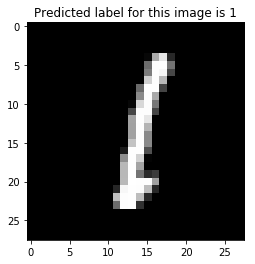

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np

# Choose a sample you want to visualize the test result for.
sampleID = 2;
sampleImage = np.reshape(teXSub[:,sampleID],(28,28))
plt.title("Predicted label for this image is %i" %testResults[sampleID])
plt.imshow(sampleImage, interpolation='nearest', cmap='gray')
plt.show()
